In [1]:
import numpy as np
from scipy.fftpack import dct, idct
from PIL import Image 
import matplotlib.pyplot as plt

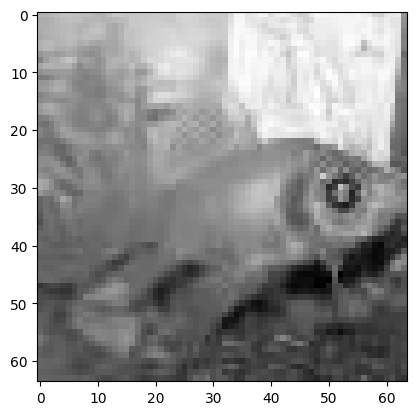

In [2]:
# Load the image as a grayscale numpy array.
image = np.array(Image.open('img.jpg').convert('L'))
plt.imshow(image, cmap='gray')

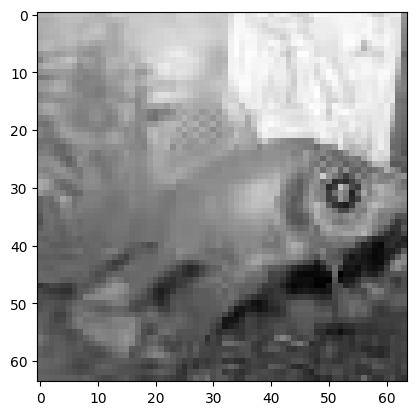

In [3]:
# Compute the 2D DCT of the image.
dct_image = dct(dct(image, axis=0, norm='ortho'), axis=1, norm='ortho')

# Select the low-frequency space by keeping only a fraction r of the lowest frequency directions.
r = 0.1  # Select 10% of the lowest frequency directions.
num_cols = int(dct_image.shape[1] * r)
B_low_freq = dct(np.eye(dct_image.shape[0]), axis=0, norm='ortho')[:, :num_cols]

# Generate a random perturbation vector in the low-frequency space.
eps = 0.1  # Set the maximum magnitude of the perturbation.
r = np.random.normal(size=num_cols)
delta_low_freq = eps * B_low_freq @ r

# Scale the perturbation vector.
delta_low_freq = np.clip(delta_low_freq, -eps, eps)

# Compute the perturbed image by adding the perturbation vector to the DCT image and applying the inverse DCT.
dct_perturbed_image = dct_image + delta_low_freq.reshape(1, -1)
perturbed_image = idct(idct(dct_perturbed_image, axis=0, norm='ortho'), axis=1, norm='ortho')

# Clip the pixel values to the valid range [0, 255].
perturbed_image = np.clip(perturbed_image, 0, 255).astype(np.uint8)

# plot the perturbed image.
plt.imshow(perturbed_image, cmap='gray')